In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn
import numpy as np
import sklearn.pipeline
from sklearn import decomposition
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from mlxtend.preprocessing import TransactionEncoder

## TF-IDF for Word Cloud

### Preparing Data for TF-IDF

We have different datasets for different review classes. In each one we have a column for the review itself and another field determining the number of stars of the review.

Here we needed to put all reviews from the same class in a unique file.

In [55]:
df_c1 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_1',header=None) 

df_c1 = df_c1[[1]]
df_c1=df_c1.rename({1:'Review'},axis=1)

doc_1 = ''
for index, row in df_c1.iterrows():
    doc_1 = doc_1 + ' '+ str(row['Review'])
    
    
file = open('D:\\DTU\\Large Files\\DS\\Project\\doc_1.txt', "w")
file.write(doc_1)
file.close()

#-------------------------------------------------------------------

df_c2 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_2',header=None) 

df_c2 = df_c2[[1]]
df_c2=df_c2.rename({1:'Review'},axis=1)

doc_2 = ''
for index, row in df_c2.iterrows():
    doc_2 = doc_2 + ' '+ str(row['Review'])
    
    
file = open('D:\\DTU\\Large Files\\DS\\Project\\doc_2.txt', "w")
file.write(doc_2)
file.close()

#-------------------------------------------------------------------

df_c3 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_3',header=None) 

df_c3 = df_c3[[1]]
df_c3=df_c3.rename({1:'Review'},axis=1)

doc_3 = ''
for index, row in df_c3.iterrows():
    doc_3 = doc_3 + ' '+ str(row['Review'])
    
    
file = open('D:\\DTU\\Large Files\\DS\\Project\\doc_3.txt', "w")
file.write(doc_3)
file.close()

#-------------------------------------------------------------------

df_c4 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_4',header=None) 

df_c4 = df_c4[[1]]
df_c4=df_c4.rename({1:'Review'},axis=1)

doc_4 = ''
for index, row in df_c4.iterrows():
    doc_4 = doc_4 + ' '+ str(row['Review'])
    
    
file = open('D:\\DTU\\Large Files\\DS\\Project\\doc_4.txt', "w")
file.write(doc_4)
file.close()

#-------------------------------------------------------------------

df_c5 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_5',header=None) 

df_c5 = df_c5[[1]]
df_c5=df_c5.rename({1:'Review'},axis=1)

doc_5 = ''
for index, row in df_c5.iterrows():
    doc_5 = doc_5 + ' '+ str(row['Review'])
    
    
file = open('D:\\DTU\\Large Files\\DS\\Project\\doc_5.txt', "w")
file.write(doc_5)
file.close()

In order to find the most important words in each class, we tried to implement the TF-IDF algorithm on each of the class documents. 

TF-IDF tries to find the most common words in each document but another factor is important in TF-IDF and that is the number of the documents that these common words are included in. So a word like 'the' is probably the most common in a lot of documents but it is repeated in all of the documents so the value of this word would diminish.

In [13]:
for i in range(1,6):   
    with open('D:\\DTU\\Large Files\\DS\\Project\\doc_'+str(i)+'.txt') as f:
        globals()['doc_%s' % i] = f.read()

For each class we try to first extract the words (tokeninizing), and then we try lemmatization so that the verbs like 'changing', 'changed' and 'change' would be the same.  

### Preproccesing

In [24]:
from nltk import RegexpTokenizer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords.words('english')

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
sw = stopwords.words('english')


for i in range(1,6):  
    
    tokens = tokenizer.tokenize(globals()['doc_%s' % i])
    tokens = [w.lower() for w in tokens]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    tokens = [w  for w in tokens if w not in sw]
    globals()['tokens_%s' % i] = tokens

Here we would find all the words in all the documents. Afterwards we count the occurence of these words in each documents to compute 'TF' part.

In [39]:
all_words = []
for i in range(1,6): 
    
    all_words= all_words + (list(set(globals()['tokens_%s' % i])))
    
uniqueWords  = list(set(all_words))

In [40]:
for i in range(1,6):
    globals()['numOfWords_%s' % i] = dict.fromkeys(uniqueWords, 0)
    
    for token in globals()['tokens_%s' % i]:
        globals()['numOfWords_%s' % i][token] += 1

### Computing TF

In [44]:
def computeTF(wordDict, tokens):
    tfDict = {}
    bagOfWordsCount = len(tokens)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [45]:
for i in range(1,6):
    globals()['tf_%s' % i] = computeTF(globals()['numOfWords_%s' % i], globals()['tokens_%s' % i])

### Computing IDF

The computation of 'IDF' is done in here.

In [47]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [48]:
idfs = computeIDF([numOfWords_1, numOfWords_2,numOfWords_3,numOfWords_4,numOfWords_5])

### Computing TF-IDF

This part is to calculate TFIDF based on 'TF' and 'IDF' that we have calculated in previous parts.

In [49]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [50]:
for i in range(1,6):
    globals()['tfidf_%s' % i] = computeTFIDF(globals()['tf_%s' % i], idfs)

In [51]:
df_tfidf = pd.DataFrame([tfidf_1, tfidf_2,tfidf_3,tfidf_4,tfidf_5])

### Word Cloud

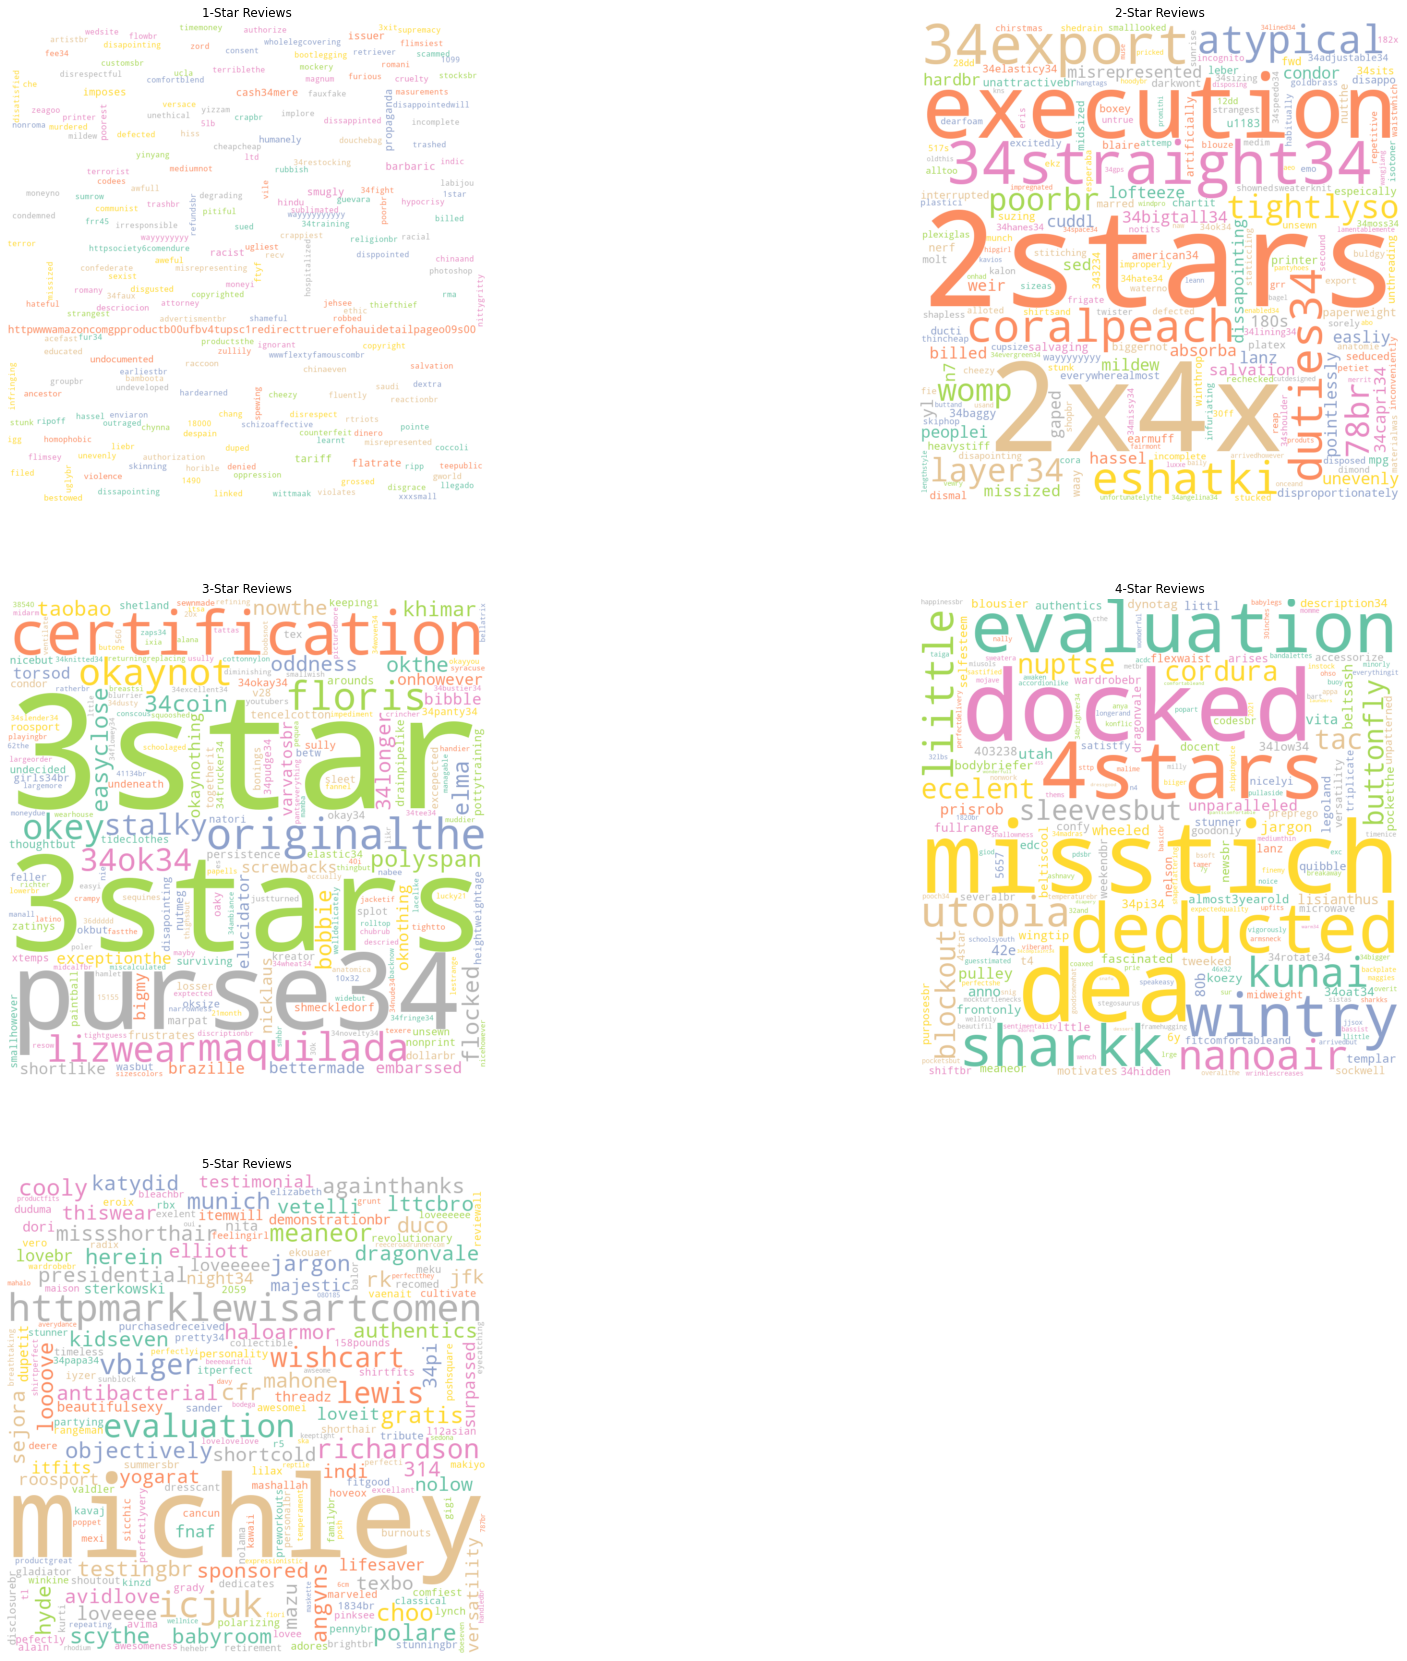

In [145]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

plt.figure(figsize = (30,30))

for i in range(1,6):

    top_100_words_freq = {k:int(v*10**8) for k, v in 
                                sorted(globals()['tfidf_%s' % i].items(), key=lambda item: item[1], reverse=True) }

    text = ' '.join(top_100_words_repetition)


    wordcloud = WordCloud(background_color="white",min_font_size=1, max_font_size=50000, max_words=200,
                          colormap='Set2',width = 1000, height = 1000).generate_from_frequencies(top_100_words_freq)
   

    
    
    plt.subplot(3,2, i)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(str(i)+'-Star Reviews')
    plt.axis('off')
    
plt.show()   

## TF-IDF for Vectorization

### Preprocessing

So again here we need to get the data of the different classes from different files. Having got the data, we try to clean the data to have 2 columns for reviews and their labels (the stars). Then we can combine the data from different datasets into one.

In [68]:
df_c1 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_1',header=None) 
df_c2 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_2',header=None) 
df_c3 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_3',header=None) 
df_c4 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_4',header=None) 
df_c5 = pd.read_fwf('D:\\DTU\\Large Files\\DS\\Project\\train_class_5',header=None) 

In [69]:
df_c1 = df_c1[[0,1]]
df_c1=df_c1.rename(columns = {0:'Label',1:'Review'})
df_c1['Label'] = df_c1['Label'].apply(lambda x: int(x[-1]))


df_c2 = df_c2[[0,1]]
df_c2=df_c2.rename(columns = {0:'Label',1:'Review'})
df_c2['Label'] = df_c2['Label'].apply(lambda x: int(x[-1]))


df_c3 = df_c3[[0,1]]
df_c3=df_c3.rename(columns = {0:'Label',1:'Review'})
df_c3['Label'] = df_c3['Label'].apply(lambda x: int(x[-1]))


df_c4 = df_c4[[0,1]]
df_c4=df_c4.rename(columns = {0:'Label',1:'Review'})
df_c4['Label'] = df_c4['Label'].apply(lambda x: int(x[-1]))


df_c5 = df_c5[[0,1]]
df_c5=df_c5.rename(columns = {0:'Label',1:'Review'})
df_c5['Label'] = df_c5['Label'].apply(lambda x: int(x[-1]))

df = pd.concat([df_c1, df_c2,df_c3,df_c4,df_c5])
df = df.reset_index()

X = df['Review']
X = X.astype('str')
y = df['Label']

### TF-IDF Calculation

Unlike the previous part, here we do not implement TF-IDF algorithm from scratch and we try to use the already implemented function from 'sklearn' library.

In [6]:
def tfidf(X_train,y_train,X_test,ngram_range,max_features):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range,stop_words='english',max_features=max_features)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    
    return X_train_vect,X_test_vect

At first, we try to split the data into train and test parts. 70% of the data would our train data and the rest would be test data. So we would try to calculate and fit TF-IDF vectors for train data and then transform both the train and test data on it to get the vectors out of each of them. 

There are two parameters which are really important. The first one is the ngram_range which decides about the grams of our tokens. For instance, consider the sentence 'I can work from the noon'. For this sentence the 1-gram tokens are 'I', 'can', 'work', 'from', 'the', 'noon' but 2-gram tokens for this sentence would be 'I can', 'can work', 'work from', 'from the', 'the noon'. So using more n-grams will result in more features for our vectors. Here we used 1-gram, 2-gram and 3-gram tokens to build our vectors

The other parameter is 'max_features' which puts a limitation on the number of features of the vectors. There are some words that are perhaps used in very few reviews and probably deleting them from our vector calculation would not have a major impact on our results so we would just try to delete these features to make our vectors smaller. This part is neccessary since not using that would explode the vector and we would not have enough RAM to calculate the vectors

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_vect,X_test_vect = tfidf(X_train,y_train,X_test,ngram_range=(1,3),max_features=1000000)

### Prediction

Here we have the vectors for both of our train and test data. So we will use a logistic regression model with hyperparameter 'C' equal to 10 to be fitted on the vectors of our train data. Then it will predict the accuracy on our test data based on the vectors that we have previously calculated. The accuray on test data is about 51%

In [ ]:
lr = LogisticRegression(C=10)
lr.fit(X_train_vect, y_train)

y_pred = lr.predict(X_test_vect)
accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)
print(accuracy)

## Frequent Items

Here we use apriori algorith to find the most common words that are used together in each of the classes. So here the baskets are different sentences. In each basket we have different items. So here we can interpret that words are our items.

Here again we have to clean the texts at first. So, we will tokenize the text to get the words, then we try to make all of the words lowercased. Afterwards, the lemmaztization is implemented and then we just omit the stopwords which are the words like 'am' , 'is' , 'are' and 'the'. It is done since if not, then they will be the items which are used most commonly together but we are interested in other words which will give us more sense about the data.

We then will limit the apriori to search for the items with minimum support of 0.02 which means the items must be seen in at least 0.02 of all the reviews. The algorithm will try to find all the combination of words with the support of mimimum 0.02 so they can be just one word or they can be a combination of 5 words as long as their support is at minimum 0.02. Here we are interested in the combination of 3 or more words. So for each of the classes we showed the top 10 combinations which have the highest support. As we can see there is not much difference between the different top combinations of the different classes .

In [5]:
def freq_items(file_path):
    
    df_c = pd.read_fwf(file_path,header=None)
    df_c = df_c[[0,1]]
    df_c=df_c.rename(columns = {0:'Label',1:'Review'})
    df_c['Label'] = df_c['Label'].apply(lambda x: int(x[-1]))
    
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    df_c["Review"] = df_c["Review"].astype('str')
    df_c["Review"] = df_c["Review"].apply(tokenizer.tokenize)
    df_c["Review"] = df_c["Review"].apply(lambda x: [i.lower() for i in x ] )
    df_c["Review"] = df_c["Review"].apply(lambda x: [lemmatizer.lemmatize(i) for i in x ] )
    df_c["Review"] = df_c["Review"].apply(lambda x: [i for i in x if not i in stop_words ] )
    
    te = TransactionEncoder()


    te_ary_c = te.fit(df_c["Review"]).transform(df_c["Review"])
    reviews_ap_c = pd.DataFrame(te_ary_c, columns=te.columns_)
    
    frequent_itemsets_c = apriori(reviews_ap_c, min_support=0.02, use_colnames=True)
    frequent_itemsets_c['length'] = frequent_itemsets_c['itemsets'].apply(lambda x: len(x))
    
    frequent_itemsets_c_34 = frequent_itemsets_c[frequent_itemsets_c['length'].isin([3,4])]
    
    return frequent_itemsets_c_34.sort_values('support',ascending = False).head(10)

### 1-Stars

In [6]:
freq_items(file_path='D:\\DTU\\Large Files\\DS\\Project\\train_class_1')

,support,itemsets,length
246,0.039212,"(wa, small, size)",3
235,0.030275,"(small, size, fit)",3
243,0.029013,"(small, size, ordered)",3
238,0.028288,"(like, look, picture)",3
244,0.027713,"(wa, size, ordered)",3
236,0.027312,"(wa, size, fit)",3
245,0.025950,"(wa, small, ordered)",3
237,0.025650,"(small, wa, fit)",3
247,0.024906,"(small, size, way)",3
248,0.024737,"(wa, small, way)",3


### 2-Stars

In [7]:
freq_items(file_path='D:\\DTU\\Large Files\\DS\\Project\\train_class_2')

,support,itemsets,length
309,0.043588,"(small, wa, size)",3
297,0.036944,"(wa, size, fit)",3
296,0.035338,"(small, size, fit)",3
300,0.031744,"(small, wa, fit)",3
307,0.030006,"(wa, size, ordered)",3
292,0.029344,"(wa, like, fit)",3
306,0.029256,"(small, size, ordered)",3
290,0.026444,"(like, size, fit)",3
308,0.025400,"(wa, small, ordered)",3
293,0.025294,"(size, ordered, fit)",3


### 3-Stars

In [8]:
freq_items(file_path='D:\\DTU\\Large Files\\DS\\Project\\train_class_3')

,support,itemsets,length
292,0.033594,"(wa, size, fit)",3
301,0.033519,"(small, wa, size)",3
291,0.032412,"(small, size, fit)",3
295,0.026481,"(small, wa, fit)",3
288,0.025819,"(like, size, fit)",3
299,0.025344,"(wa, size, ordered)",3
290,0.025081,"(size, ordered, fit)",3
294,0.024925,"(size, would, fit)",3
289,0.024850,"(wa, like, fit)",3
298,0.024650,"(small, size, ordered)",3


### 4-Stars

In [9]:
freq_items(file_path='D:\\DTU\\Large Files\\DS\\Project\\train_class_4')

,support,itemsets,length
315,0.031456,"(wa, size, fit)",3
314,0.027144,"(small, size, fit)",3
313,0.026931,"(size, ordered, fit)",3
309,0.026819,"(like, size, fit)",3
316,0.026456,"(wear, size, fit)",3
317,0.025150,"(size, would, fit)",3
310,0.023256,"(wa, like, fit)",3
321,0.022550,"(small, wa, size)",3
319,0.021925,"(wa, would, fit)",3
308,0.021319,"(im, size, fit)",3


### 5-Stars

In [10]:
freq_items(file_path='D:\\DTU\\Large Files\\DS\\Project\\train_class_5')

,support,itemsets,length
235,0.028987,"(love, great, fit)",3
239,0.024169,"(love, size, fit)",3
241,0.023706,"(wa, size, fit)",3
238,0.023156,"(love, fit, perfect)",3
242,0.022819,"(wear, size, fit)",3
236,0.021888,"(great, size, fit)",3
234,0.021875,"(great, look, fit)",3
240,0.021475,"(size, ordered, fit)",3
237,0.020962,"(wa, great, fit)",3
